# Import all necessary libraries


In [1]:
import pandas as pd

# Load training data

In [2]:
df = pd.read_csv('/home/abhishek/Documents/NLP/Blog/spam-ham-classifier/train.csv')

# Display data

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Delete all unnecessary columns and display data

In [4]:
del_columns = []
for col in df.columns:
    if col not in ['Id','LotArea','SalePrice']:
        del_columns.append(col)

In [5]:
df.drop(del_columns,axis = 1 , inplace=True)

In [6]:
df

,Id,LotArea,SalePrice
0,1,8450,208500
1,2,9600,181500
2,3,11250,223500
3,4,9550,140000
4,5,14260,250000
5,6,14115,143000
6,7,10084,307000
7,8,10382,200000
8,9,6120,129900
9,10,7420,118000


# Prepare training data

In [7]:
from sklearn.model_selection import train_test_split

X = df['LotArea']
Y = df['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Define regression model

In [8]:
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
        
def LinearRegression():
    model = Sequential()
    model.add(Dense(1, activation = 'linear', use_bias = True, input_dim = 1))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.1), loss = 'mean_squared_error', metrics = ['mae'])
    return model 

model = LinearRegression()

Using TensorFlow backend.


# Define callback

In [9]:
from tensorflow import keras

params_history = []
weights_history = []
bias_history = []

class MyCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs):
        weight, bias = model.get_weights()
        B = bias[0] 
        W = weight[0][0]
        params = [W, B]
        params_history.append(params)
        weights_history.append(W)
        bias_history.append(B)
        
callback = MyCallback()

In [10]:
model.fit(X_train, Y_train, epochs = 1000, batch_size = 128, verbose = False, callbacks=[callback])

In [11]:
df2 = pd.read_csv('/home/abhishek/Documents/NLP/Blog/spam-ham-classifier/test.csv')

In [12]:
df2.drop(del_columns,axis = 1 , inplace=True)

In [13]:
df2

,Id,LotArea
0,1461,11622
1,1462,14267
2,1463,13830
3,1464,9978
4,1465,5005
5,1466,10000
6,1467,7980
7,1468,8402
8,1469,10176
9,1470,8400


In [14]:
test = df2['LotArea']

output = model.predict(test)

In [15]:
%matplotlib inline

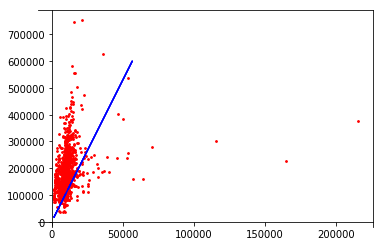

In [16]:
import matplotlib.pyplot as plt
import numpy as np

area = np.pi * 1**2

fig, ax = plt.subplots()

ax.scatter(X_train,Y_train,s = area, color = 'red')
ax.plot(test,output,'b')

# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right']#.set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top']#.set_color('none')
ax.xaxis.tick_bottom()

plt.show()

In [27]:
one,two = model.get_weights()

In [28]:
one

array([[10.599168]], dtype=float32)

In [29]:
two

array([980.7716], dtype=float32)

In [35]:
model.predict([10000])

array([[106972.45]], dtype=float32)

# y = mx + c ~ y = Wx + B

In [36]:
10000*one[0][0] + two[0]

106972.44984436035

In [17]:
params_history

[[-1.3355074, 0.3162277],
 [-1.1261902, 0.538916],
 [-0.9270592, 0.73097116],
 [-0.7760962, 0.8944225],
 [-0.63744116, 1.0460051],
 [-0.49697697, 1.1953923],
 [-0.38103092, 1.3259311],
 [-0.21590328, 1.457289],
 [-0.097431116, 1.5827482],
 [-0.017955594, 1.6857376],
 [0.11053642, 1.8080889],
 [0.2100529, 1.9211924],
 [0.36140892, 2.0437155],
 [0.4585945, 2.1506703],
 [0.55832756, 2.2567804],
 [0.64853585, 2.360749],
 [0.748304, 2.4657454],
 [0.84207314, 2.5731387],
 [0.9297424, 2.6742167],
 [1.039679, 2.7767882],
 [1.1380543, 2.877684],
 [1.2445532, 2.9773483],
 [1.3399634, 3.0797677],
 [1.4249852, 3.1801548],
 [1.5165749, 3.2776537],
 [1.6124334, 3.3790312],
 [1.707446, 3.477161],
 [1.7994785, 3.5751464],
 [1.896482, 3.6792247],
 [1.9342108, 3.7478237],
 [2.042372, 3.853137],
 [2.13649, 3.9504032],
 [2.234134, 4.0470195],
 [2.3193765, 4.1458426],
 [2.4159513, 4.2438107],
 [2.5117245, 4.3441267],
 [2.6128926, 4.4410977],
 [2.6789548, 4.533024],
 [2.771535, 4.6245594],
 [2.84135, 4.7132

In [18]:
weights_history

[-1.3355074,
 -1.1261902,
 -0.9270592,
 -0.7760962,
 -0.63744116,
 -0.49697697,
 -0.38103092,
 -0.21590328,
 -0.097431116,
 -0.017955594,
 0.11053642,
 0.2100529,
 0.36140892,
 0.4585945,
 0.55832756,
 0.64853585,
 0.748304,
 0.84207314,
 0.9297424,
 1.039679,
 1.1380543,
 1.2445532,
 1.3399634,
 1.4249852,
 1.5165749,
 1.6124334,
 1.707446,
 1.7994785,
 1.896482,
 1.9342108,
 2.042372,
 2.13649,
 2.234134,
 2.3193765,
 2.4159513,
 2.5117245,
 2.6128926,
 2.6789548,
 2.771535,
 2.84135,
 2.9303153,
 3.030989,
 3.128127,
 3.220022,
 3.2683043,
 3.374233,
 3.4677079,
 3.559387,
 3.668335,
 3.7631097,
 3.8543165,
 3.9525003,
 4.040512,
 4.1361485,
 4.192659,
 4.291506,
 4.3901534,
 4.4938045,
 4.5227404,
 4.609986,
 4.6994424,
 4.709092,
 4.8108153,
 4.9219728,
 5.025949,
 5.0582814,
 5.1732135,
 5.2673697,
 5.3743157,
 5.481927,
 5.465946,
 5.5663285,
 5.670908,
 5.7857413,
 5.886034,
 5.978547,
 6.065247,
 6.1590886,
 6.148388,
 6.2193413,
 6.323789,
 6.270451,
 6.3583274,
 6.467386,
 6

In [19]:
bias_history

[0.3162277,
 0.538916,
 0.73097116,
 0.8944225,
 1.0460051,
 1.1953923,
 1.3259311,
 1.457289,
 1.5827482,
 1.6857376,
 1.8080889,
 1.9211924,
 2.0437155,
 2.1506703,
 2.2567804,
 2.360749,
 2.4657454,
 2.5731387,
 2.6742167,
 2.7767882,
 2.877684,
 2.9773483,
 3.0797677,
 3.1801548,
 3.2776537,
 3.3790312,
 3.477161,
 3.5751464,
 3.6792247,
 3.7478237,
 3.853137,
 3.9504032,
 4.0470195,
 4.1458426,
 4.2438107,
 4.3441267,
 4.4410977,
 4.533024,
 4.6245594,
 4.713225,
 4.8076735,
 4.9015284,
 5.0016274,
 5.0965385,
 5.190896,
 5.294266,
 5.3916144,
 5.479159,
 5.581731,
 5.6703987,
 5.767693,
 5.860294,
 5.957062,
 6.0529184,
 6.1365457,
 6.234225,
 6.333215,
 6.4301863,
 6.5242147,
 6.612884,
 6.7030654,
 6.788914,
 6.886503,
 6.9887505,
 7.085009,
 7.17515,
 7.2795224,
 7.369784,
 7.4676394,
 7.5629077,
 7.6506186,
 7.7458525,
 7.836775,
 7.938281,
 8.040084,
 8.130633,
 8.22484,
 8.314418,
 8.403409,
 8.479879,
 8.573384,
 8.6663475,
 8.768055,
 8.871146,
 8.960142,
 9.044882,
 9.14

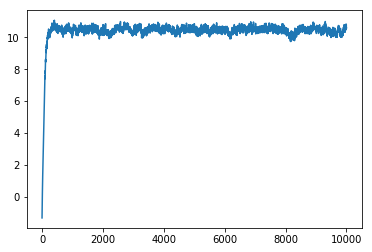

In [21]:
plt.plot(weights_history)

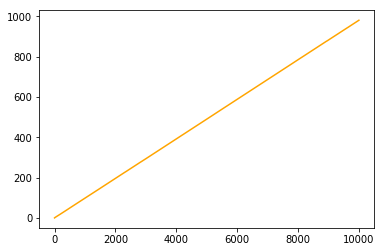

In [34]:
plt.plot(bias_history, 'orange')

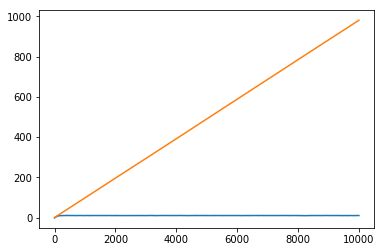

In [30]:
plt.plot(params_history)

In [26]:
weights_history[-1]

10.599168